### Dataset Description
In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

E.g. The Karate Kid (id: 5266) was released in 1986, while a clearly (or maybe just subjectively) inferior remake (id: 1987) was released in 2010.
Also, while the Frozen (id: 5295) released by Disney in 2013 may be the household name, don't forget about the less-popular Frozen (id: 139) released three years earlier about skiers who are stranded on a chairlift…


### Predicting Box Office Revenue Using TMDB Dataset

### Importing necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast 
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor


### Loading the dataset

In [3]:
train=pd.read_csv("train.csv")

In [4]:
test=pd.read_csv("test.csv")

In [6]:
train.shape,test.shape

((3000, 23), (4398, 22))

In [7]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### EDA and Data Cleaning

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [9]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [10]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [11]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [18]:
# get categorical columns
cat_cols = train.select_dtypes(include=['object']).columns

print(cat_cols)

Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast',
       'crew'],
      dtype='object')


In [19]:
num_cols=train.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')


### Handling missing values

In [12]:
# The release date for the movie "Jails, Hospitals & Hip-Hop" is missing. 
test[test["release_date"].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN


In [13]:
# Addin the release date 05/01/2020, which I found through a quick online search
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
test[test["release_date"]== '5/1/00']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN
1731,4732,NaN,103000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0172495,en,Gladiator,"In the year 180, the death of emperor Marcus A...",23.186667,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de..."


In [14]:
 #For nominal data, replacing the missing values with "none"

train[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = train[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")

In [15]:
test[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = test[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")

In [20]:
# For numerical data, replacing the missing values with the mean
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())
train['runtime'].isnull().any()

False

### Formatting the dates

In [21]:
# Converting the format of the date and creating new year, day, and month columns

train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')

train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)


In [22]:
# Since this competition was in 2019, there shouldn't be a release that after 2019
train['release_year'].max()

2068

In [23]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))

In [24]:
train["release_year"].max()

2017

In [26]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

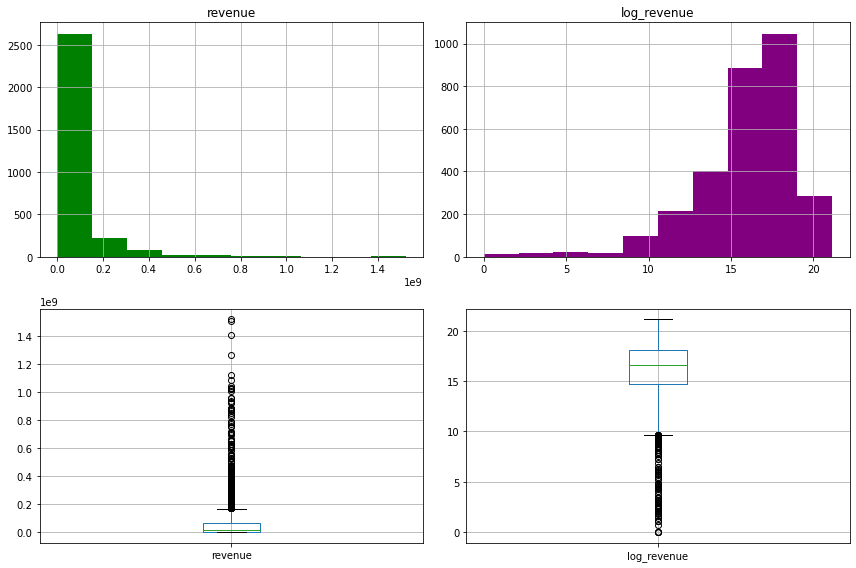

In [27]:
# Univariate Analysis: Revenue 
train['log_revenue'] = np.log(train['revenue'])

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
train.hist(column= ["revenue"], ax=ax[0][0], color='green')
train.hist(column= ['log_revenue'], ax=ax[0][1], color='purple')
train.boxplot(column= ["revenue"], ax=ax[1][0])
train.boxplot(column= ['log_revenue'], ax=ax[1][1])

In [30]:
num_cols

Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')

In [34]:
num_cols[1:-1]

Index(['budget', 'popularity', 'runtime'], dtype='object')

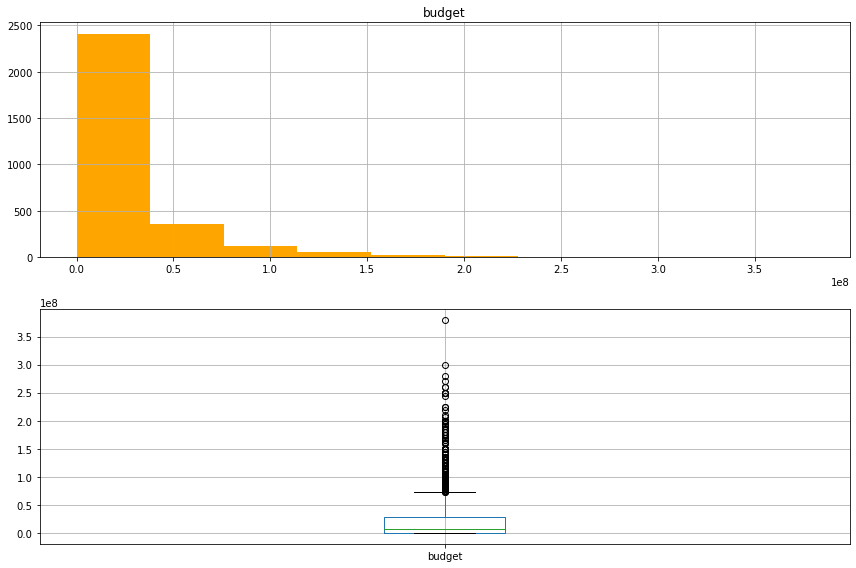

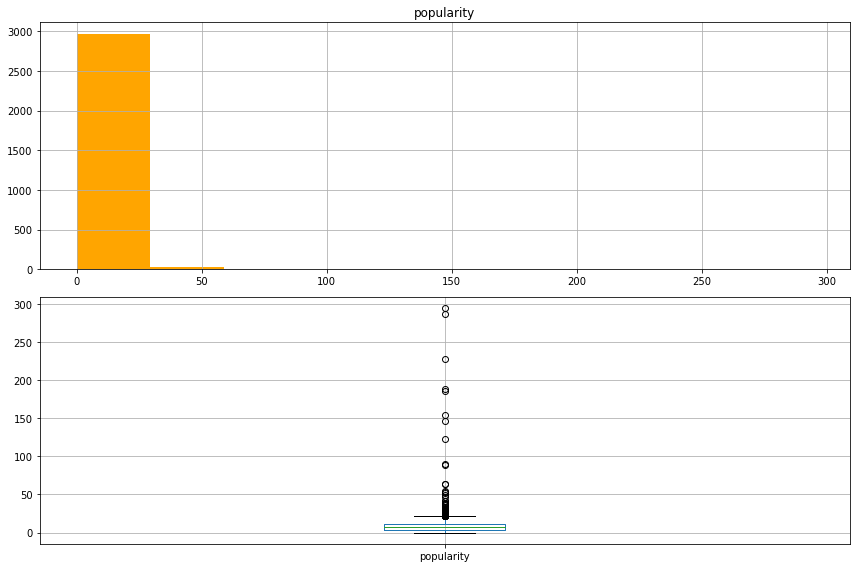

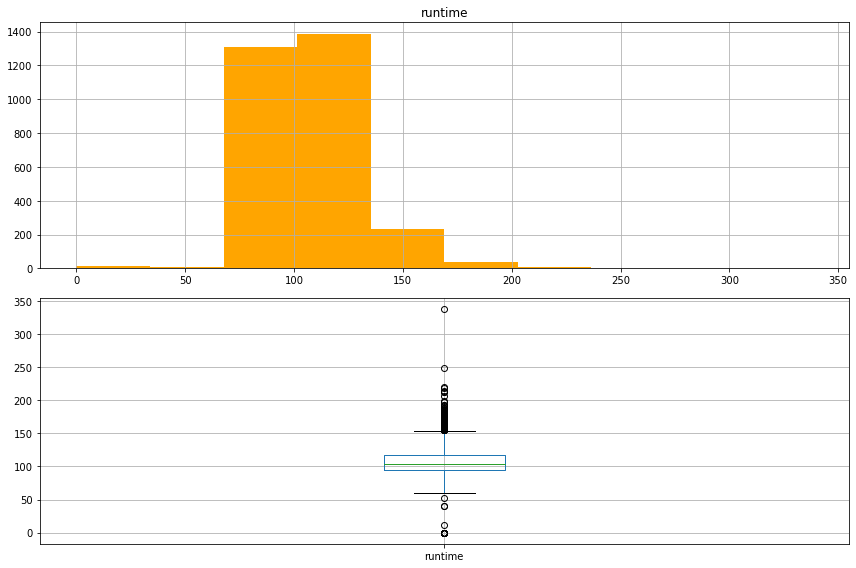

In [46]:
for i in num_cols[1:-1]:
    fig, ax = plt.subplots(2, 1, figsize = (12, 8), tight_layout=True,)
    train.hist(column= [i], ax=ax[0], color='orange')
    train.boxplot(column= [i], ax=ax[1])


    

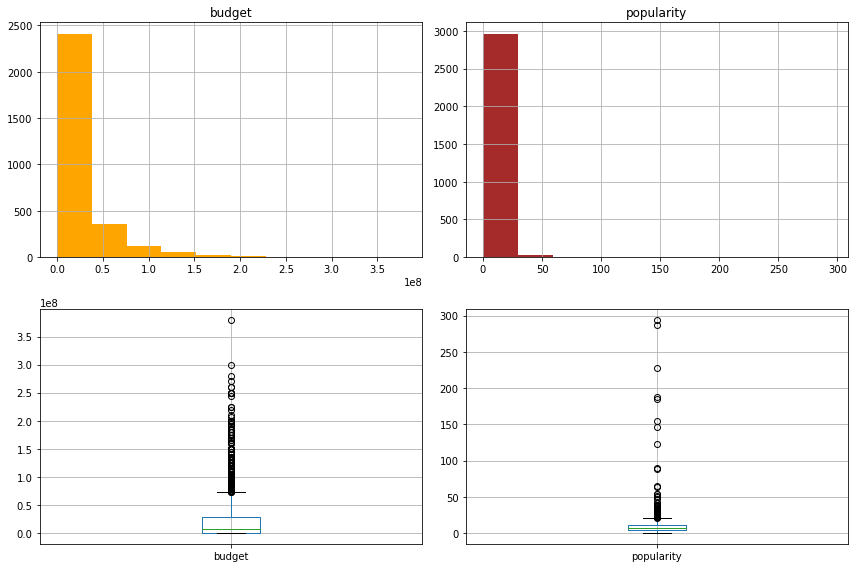

In [28]:
# Univariate Analysis: Budget & Popularity

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True,)
train.hist(column= ["budget"], ax=ax[0][0], color='orange')
train.hist(column= ['popularity'], ax=ax[0][1], color='brown')
train.boxplot(column= ['budget'], ax=ax[1][0])
train.boxplot(column= ['popularity'], ax=ax[1][1])

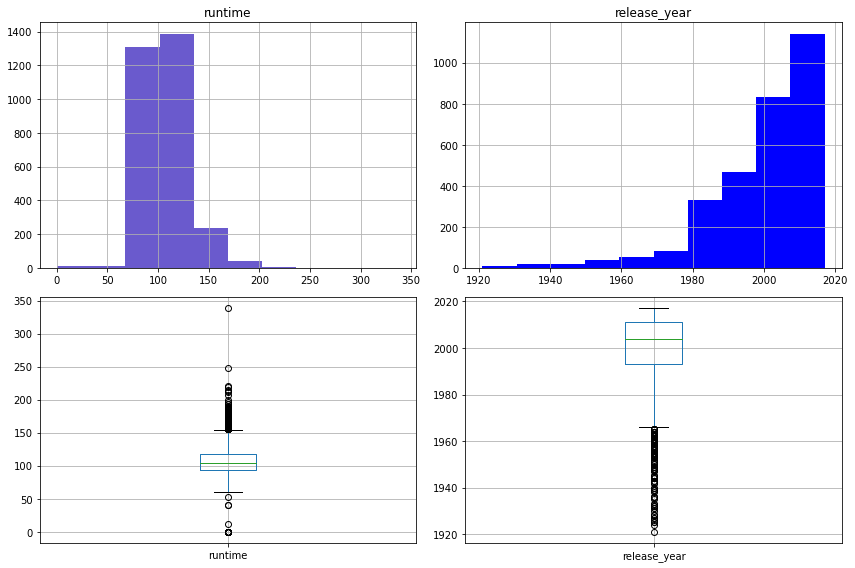

In [43]:
# Univariate Analysis: Runtime & Release Year 

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
train.hist(column= ["runtime"], ax=ax[0][0], color='slateblue')
train.hist(column= ['release_year'], ax=ax[0][1], color='blue')
train.boxplot(column= ['runtime'], ax=ax[1][0])
train.boxplot(column= ['release_year'], ax=ax[1][1])

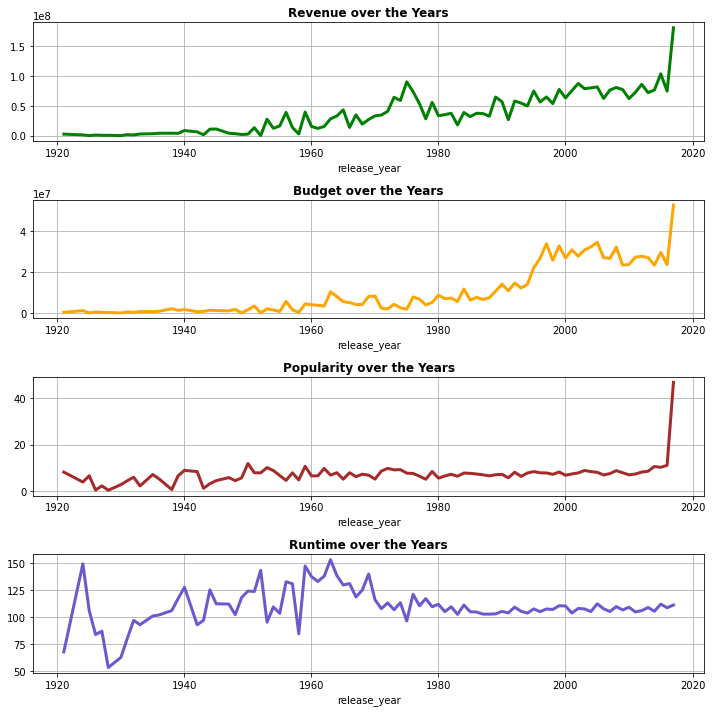

In [44]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

train.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

train.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

train.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

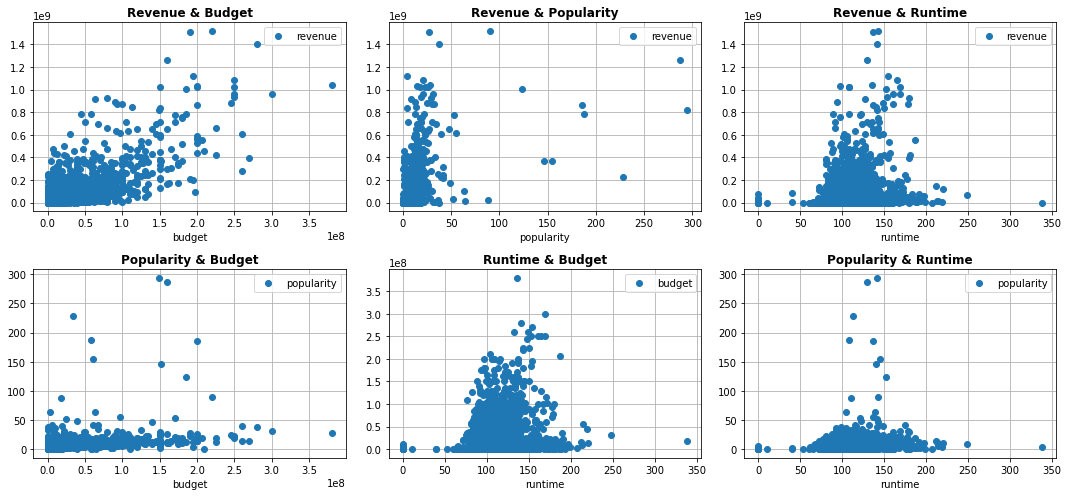

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

train.plot(ax=ax[0][0], x='budget', y='revenue', style='o').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

train.plot(ax=ax[0][1], x='popularity', y='revenue', style='o').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

train.plot(ax=ax[0][2], x='runtime', y='revenue', style='o').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

train.plot(ax=ax[1][0], x='budget', y='popularity', style='o').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

train.plot(ax=ax[1][1], x='runtime', y='budget', style='o').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

train.plot(ax=ax[1][2], x='runtime', y='popularity', style='o').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

In [52]:
# Many features are in json format.  
for e in enumerate(test['genres'][:10]):
    print(e)

(0, "[{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]")
(1, "[{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]")
(2, "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]")
(3, "[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}, {'id': 9648, 'name': 'Mystery'}]")
(4, "[{'id': 36, 'name': 'History'}, {'id': 99, 'name': 'Documentary'}]")
(5, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]")
(6, "[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]")
(7, "[{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}]")
(8, "[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]")
(9, "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]")


In [53]:
# First, I am converting the features in Json format to nominal format
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [54]:
train.genres = train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.cast = train.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.crew = train.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

test.genres = test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.cast = test.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.crew = test.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

train.crew.head()

0    Adam Blum,Allison Gordin,Andrew Panay,Annabell...
1    Bruce Green,Charles Minsky,Debra Martin Chase,...
2    Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...
3                  Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh
4                        Jong-seok Yoon,Jong-seok Yoon
Name: crew, dtype: object

In [56]:
# Then, I am counting the occurances in those features which I plan to use in the model, unless they are not redundant.
# For instance, one might expect higher revenue from a movie if that movie was produced in several spoken languages and/or had a more crowded crew. 

train['genres_count'] = train['genres'].str.count(',') + 1
train['spoken_languages_count'] = train['spoken_languages'].str.count(',') + 1
train['cast_count'] = train['cast'].str.count(',') + 1
train['crew_count'] = train['crew'].str.count(',') + 1

test['genres_count'] = test['genres'].str.count(',') + 1
test['spoken_languages_count'] = test['spoken_languages'].str.count(',') + 1
test['cast_count'] = test['cast'].str.count(',') + 1
test['crew_count'] = test['crew'].str.count(',') + 1
test['genres_count']

0       4
1       2
2       2
3       3
4       2
       ..
4393    1
4394    4
4395    1
4396    2
4397    1
Name: genres_count, Length: 4398, dtype: int64

In [57]:
# Converting nominal data to numberical data 
train[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = train[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

train['status'] = train['status'].cat.codes
train['original_language'] = train['original_language'].cat.codes
train['production_companies'] = train['production_companies'].cat.codes
train['production_countries'] = train['production_countries'].cat.codes

test[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = test[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

test['status'] = test['status'].cat.codes
test['original_language'] = test['original_language'].cat.codes
test['production_companies'] = test['production_companies'].cat.codes
test['production_countries'] = test['production_countries'].cat.codes

train['production_countries']


0       316
1       316
2       316
3       210
4       236
       ... 
2995    316
2996    111
2997    316
2998    316
2999    316
Name: production_countries, Length: 3000, dtype: int16

In [59]:
# Budget has zero values for many movies including some high budget movies. 
# Additionally, it does not make sense to have movies with 0 runtimes. 
# I am imputing those zero values with mean. 
train['budget'] = train['budget'].replace(0, train['budget'].mean())  
train['runtime'] = train['runtime'].replace(0, train['runtime'].mean())  

test['budget'] = test['budget'].replace(0, test['budget'].mean())  
test['runtime'] = test['runtime'].replace(0, test['runtime'].mean())

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3000 non-null   int64         
 1   belongs_to_collection   604 non-null    object        
 2   budget                  3000 non-null   float64       
 3   genres                  3000 non-null   object        
 4   homepage                946 non-null    object        
 5   imdb_id                 3000 non-null   object        
 6   original_language       3000 non-null   int8          
 7   original_title          3000 non-null   object        
 8   overview                2992 non-null   object        
 9   popularity              3000 non-null   float64       
 10  poster_path             2999 non-null   object        
 11  production_companies    3000 non-null   int16         
 12  production_countries    3000 non-null   int16   

In [62]:
train["homepage"]

0                                     NaN
1                                     NaN
2       http://sonyclassics.com/whiplash/
3              http://kahaanithefilm.com/
4                                     NaN
                      ...                
2995                                  NaN
2996                                  NaN
2997                                  NaN
2998       http://www.alongcamepolly.com/
2999     http://www.abductionthefilm.com/
Name: homepage, Length: 3000, dtype: object

### Data Pre-Processing

In [63]:
# Assigning the data corresponding to the target and predictor variables
y = train['log_revenue']
X = train.drop(['log_revenue', 'revenue'], axis=1)

In [64]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [65]:
# Creating the list of features
feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X_train_full = X_train_full[feature_names]

X_valid_full = X_valid_full[feature_names]

X_train_full.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
642,1988,1,6,0,7,39000000.00,7.830087,2,1391,316,1,14,12,116.0
700,1986,4,12,0,7,25000000.00,7.409179,3,1812,316,1,17,15,94.0
226,2011,3,2,0,7,50000000.00,7.668829,4,1766,316,1,51,70,105.0
1697,1992,4,1,0,7,22531334.11,5.860319,3,1988,182,1,12,6,132.0
1010,2015,4,7,0,7,35000000.00,17.310647,1,2082,316,1,34,22,125.0


### Model Building

In [66]:
#Defining the Random Forest Model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train_full, y_train)

RandomForestRegressor(random_state=1)

In [67]:
# Prediction
y_pred_rf = rf_model.predict(X_valid_full)

In [68]:
# Calculate MAE 
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

print("Mean Absolute Error RF:" , mae_rf)

Mean Absolute Error RF: 1.356911847183321


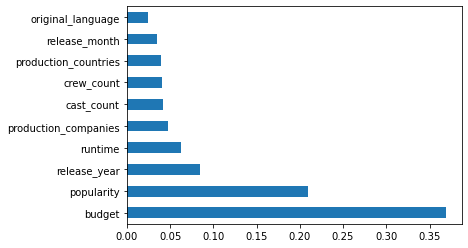

In [69]:
# Calculating feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [70]:
# Define the model
xgb_model = XGBRegressor() 

# Fit the model
xgb_model.fit(X_train_full, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [72]:
# Prediction
y_pred_xgb = xgb_model.predict(X_valid_full)

In [73]:
# Calculate MAE 
mae_xgb = mean_absolute_error(y_pred_xgb, y_valid)

print("Mean Absolute Error XGBOOST:" , mae_xgb)

Mean Absolute Error XGBOOST: 1.5031416871680505


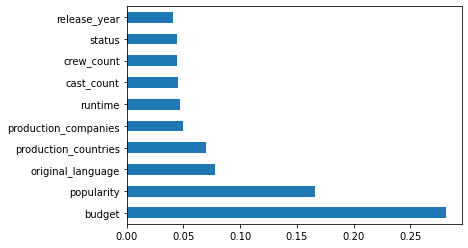

In [74]:
# Calculating feature importance for the XGBoost Model
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [77]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 642 to 860
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            2400 non-null   int64  
 1   release_day             2400 non-null   int32  
 2   release_month           2400 non-null   int32  
 3   status                  2400 non-null   int8   
 4   original_language       2400 non-null   int8   
 5   budget                  2400 non-null   float64
 6   popularity              2400 non-null   float64
 7   genres_count            2400 non-null   int64  
 8   production_companies    2400 non-null   int16  
 9   production_countries    2400 non-null   int16  
 10  spoken_languages_count  2400 non-null   int64  
 11  cast_count              2400 non-null   int64  
 12  crew_count              2400 non-null   int64  
 13  runtime                 2400 non-null   float64
dtypes: float64(3), int16(2), int32(2), int6

### Tuning the model for better results

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error





# define the random forest model
rf = RandomForestRegressor()

# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define the random search cross-validation object
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# fit the random search object to the training data
rf_random.fit(X_train_full, y_train)

# get the best hyperparameters and the corresponding accuracy score
best_params = rf_random.best_params_
best_score = rf_random.best_score_

# initialize the model with the best hyperparameters and fit to the training data
rf_best = RandomForestRegressor(**best_params)
rf_best.fit(X_train_full, y_train)

# evaluate the model on the testing data
y_pred_rf = rf_best.predict(X_valid_full)
mse = mean_squared_error(y_valid, y_pred_rf)


print("Best parameters:", best_params)
print("Best score:", best_score)
print("Validation mse:",mse)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 25}
Best score: 0.5134566363474853
Validation mse: 4.0805722085321126


In [81]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# define the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# define the hyperparameter search space
params = {'n_estimators': [100, 500, 1000],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.01, 0.1, 0.5],
          'reg_alpha': [0, 0.1, 1]}

# define the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train_full, y_train)

# print the best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', -grid_search.best_score_)

# evaluate the performance of the tuned model on the test set
tuned_model = xgb.XGBRegressor(**grid_search.best_params_)
tuned_model.fit(X_train_full, y_train)
y_pred_xgb = tuned_model.predict(X_valid_full)
score = mean_squared_error(y_valid, y_pred_xgb)
print('validation score: ', score)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1}
Best score:  4.661748536646262
validation score:  4.04106184119158


In [82]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# define the CatBoost regressor model
catboost_model = CatBoostRegressor()

# define the hyperparameter search space
params = {'learning_rate': [0.01, 0.05, 0.1],
          'depth': [3, 5, 7],
          'rsm': [0.5, 0.75, 1]}

# define the grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train_full, y_train)

# print the best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', -grid_search.best_score_)

# evaluate the performance of the tuned model on the test set
tuned_model = CatBoostRegressor(**grid_search.best_params_)
tuned_model.fit(X_train_full, y_train)
y_pred_cb = tuned_model.predict(X_valid_full)
test_score = mean_squared_error(y_valid, y_pred_cb)
print('validation score: ', test_score)


0:	learn: 3.0764919	total: 256ms	remaining: 4m 15s
1:	learn: 3.0649940	total: 333ms	remaining: 2m 46s
2:	learn: 3.0532534	total: 401ms	remaining: 2m 13s
3:	learn: 3.0433894	total: 424ms	remaining: 1m 45s
4:	learn: 3.0324003	total: 625ms	remaining: 2m 4s
5:	learn: 3.0213242	total: 655ms	remaining: 1m 48s
6:	learn: 3.0110154	total: 690ms	remaining: 1m 37s
7:	learn: 3.0006594	total: 789ms	remaining: 1m 37s
8:	learn: 2.9902210	total: 882ms	remaining: 1m 37s
9:	learn: 2.9800545	total: 923ms	remaining: 1m 31s
10:	learn: 2.9693396	total: 946ms	remaining: 1m 25s
11:	learn: 2.9589468	total: 982ms	remaining: 1m 20s
12:	learn: 2.9497055	total: 1.04s	remaining: 1m 18s
13:	learn: 2.9405284	total: 1.06s	remaining: 1m 14s
14:	learn: 2.9306805	total: 1.09s	remaining: 1m 11s
15:	learn: 2.9212683	total: 1.11s	remaining: 1m 8s
16:	learn: 2.9120621	total: 1.14s	remaining: 1m 5s
17:	learn: 2.9036326	total: 1.17s	remaining: 1m 3s
18:	learn: 2.8944452	total: 1.19s	remaining: 1m 1s
19:	learn: 2.8851259	total:

164:	learn: 2.2355123	total: 3.46s	remaining: 17.5s
165:	learn: 2.2332813	total: 3.49s	remaining: 17.6s
166:	learn: 2.2316969	total: 3.51s	remaining: 17.5s
167:	learn: 2.2299130	total: 3.54s	remaining: 17.5s
168:	learn: 2.2278390	total: 3.55s	remaining: 17.5s
169:	learn: 2.2265039	total: 3.56s	remaining: 17.4s
170:	learn: 2.2249682	total: 3.58s	remaining: 17.4s
171:	learn: 2.2230093	total: 3.59s	remaining: 17.3s
172:	learn: 2.2213756	total: 3.62s	remaining: 17.3s
173:	learn: 2.2197324	total: 3.63s	remaining: 17.2s
174:	learn: 2.2182741	total: 3.64s	remaining: 17.2s
175:	learn: 2.2162708	total: 3.65s	remaining: 17.1s
176:	learn: 2.2145670	total: 3.66s	remaining: 17s
177:	learn: 2.2124884	total: 3.67s	remaining: 17s
178:	learn: 2.2108577	total: 3.68s	remaining: 16.9s
179:	learn: 2.2086996	total: 3.7s	remaining: 16.8s
180:	learn: 2.2072037	total: 3.71s	remaining: 16.8s
181:	learn: 2.2050234	total: 3.72s	remaining: 16.7s
182:	learn: 2.2028843	total: 3.73s	remaining: 16.6s
183:	learn: 2.200

331:	learn: 2.0252509	total: 5.57s	remaining: 11.2s
332:	learn: 2.0243395	total: 5.58s	remaining: 11.2s
333:	learn: 2.0238178	total: 5.59s	remaining: 11.2s
334:	learn: 2.0228937	total: 5.62s	remaining: 11.2s
335:	learn: 2.0221544	total: 5.63s	remaining: 11.1s
336:	learn: 2.0209804	total: 5.64s	remaining: 11.1s
337:	learn: 2.0199525	total: 5.66s	remaining: 11.1s
338:	learn: 2.0192558	total: 5.67s	remaining: 11.1s
339:	learn: 2.0182559	total: 5.68s	remaining: 11s
340:	learn: 2.0177733	total: 5.7s	remaining: 11s
341:	learn: 2.0170324	total: 5.72s	remaining: 11s
342:	learn: 2.0162248	total: 5.74s	remaining: 11s
343:	learn: 2.0154313	total: 5.76s	remaining: 11s
344:	learn: 2.0148775	total: 5.77s	remaining: 10.9s
345:	learn: 2.0142627	total: 5.78s	remaining: 10.9s
346:	learn: 2.0135435	total: 5.79s	remaining: 10.9s
347:	learn: 2.0127036	total: 5.8s	remaining: 10.9s
348:	learn: 2.0120066	total: 5.82s	remaining: 10.9s
349:	learn: 2.0113010	total: 5.83s	remaining: 10.8s
350:	learn: 2.0108535	to

499:	learn: 1.9157058	total: 7.5s	remaining: 7.5s
500:	learn: 1.9151691	total: 7.51s	remaining: 7.48s
501:	learn: 1.9147953	total: 7.52s	remaining: 7.46s
502:	learn: 1.9144635	total: 7.53s	remaining: 7.44s
503:	learn: 1.9138589	total: 7.54s	remaining: 7.42s
504:	learn: 1.9134863	total: 7.55s	remaining: 7.4s
505:	learn: 1.9128623	total: 7.56s	remaining: 7.38s
506:	learn: 1.9121660	total: 7.57s	remaining: 7.36s
507:	learn: 1.9119224	total: 7.58s	remaining: 7.34s
508:	learn: 1.9111825	total: 7.59s	remaining: 7.32s
509:	learn: 1.9105628	total: 7.6s	remaining: 7.3s
510:	learn: 1.9100328	total: 7.61s	remaining: 7.28s
511:	learn: 1.9092722	total: 7.62s	remaining: 7.26s
512:	learn: 1.9086911	total: 7.63s	remaining: 7.25s
513:	learn: 1.9076442	total: 7.64s	remaining: 7.22s
514:	learn: 1.9068353	total: 7.65s	remaining: 7.21s
515:	learn: 1.9065127	total: 7.66s	remaining: 7.19s
516:	learn: 1.9061108	total: 7.67s	remaining: 7.17s
517:	learn: 1.9057793	total: 7.68s	remaining: 7.15s
518:	learn: 1.905

668:	learn: 1.8338923	total: 9.46s	remaining: 4.68s
669:	learn: 1.8331818	total: 9.47s	remaining: 4.67s
670:	learn: 1.8327503	total: 9.48s	remaining: 4.65s
671:	learn: 1.8322775	total: 9.49s	remaining: 4.63s
672:	learn: 1.8321277	total: 9.51s	remaining: 4.62s
673:	learn: 1.8316861	total: 9.51s	remaining: 4.6s
674:	learn: 1.8309314	total: 9.52s	remaining: 4.59s
675:	learn: 1.8301626	total: 9.53s	remaining: 4.57s
676:	learn: 1.8297352	total: 9.54s	remaining: 4.55s
677:	learn: 1.8294930	total: 9.55s	remaining: 4.54s
678:	learn: 1.8291176	total: 9.56s	remaining: 4.52s
679:	learn: 1.8283814	total: 9.57s	remaining: 4.5s
680:	learn: 1.8280710	total: 9.58s	remaining: 4.49s
681:	learn: 1.8276833	total: 9.59s	remaining: 4.47s
682:	learn: 1.8268103	total: 9.6s	remaining: 4.46s
683:	learn: 1.8265639	total: 9.61s	remaining: 4.44s
684:	learn: 1.8259075	total: 9.63s	remaining: 4.43s
685:	learn: 1.8256356	total: 9.64s	remaining: 4.41s
686:	learn: 1.8248760	total: 9.65s	remaining: 4.4s
687:	learn: 1.82

838:	learn: 1.7591795	total: 11.6s	remaining: 2.23s
839:	learn: 1.7590061	total: 11.7s	remaining: 2.22s
840:	learn: 1.7585398	total: 11.7s	remaining: 2.21s
841:	learn: 1.7580237	total: 11.7s	remaining: 2.19s
842:	learn: 1.7576586	total: 11.7s	remaining: 2.18s
843:	learn: 1.7574140	total: 11.7s	remaining: 2.17s
844:	learn: 1.7573725	total: 11.7s	remaining: 2.15s
845:	learn: 1.7567628	total: 11.7s	remaining: 2.13s
846:	learn: 1.7566760	total: 11.7s	remaining: 2.12s
847:	learn: 1.7564769	total: 11.8s	remaining: 2.11s
848:	learn: 1.7562939	total: 11.8s	remaining: 2.09s
849:	learn: 1.7560462	total: 11.8s	remaining: 2.08s
850:	learn: 1.7559065	total: 11.8s	remaining: 2.06s
851:	learn: 1.7553176	total: 11.8s	remaining: 2.05s
852:	learn: 1.7548781	total: 11.8s	remaining: 2.04s
853:	learn: 1.7547756	total: 11.8s	remaining: 2.02s
854:	learn: 1.7540740	total: 11.8s	remaining: 2.01s
855:	learn: 1.7537974	total: 11.9s	remaining: 2s
856:	learn: 1.7531697	total: 11.9s	remaining: 1.98s
857:	learn: 1.7

999:	learn: 1.7003504	total: 13.8s	remaining: 0us
Best hyperparameters:  {'depth': 7, 'learning_rate': 0.01, 'rsm': 1}
Best score:  4.709093544453709
0:	learn: 3.0764919	total: 28.2ms	remaining: 28.2s
1:	learn: 3.0649940	total: 42.3ms	remaining: 21.1s
2:	learn: 3.0532534	total: 54.6ms	remaining: 18.1s
3:	learn: 3.0433894	total: 69.2ms	remaining: 17.2s
4:	learn: 3.0324003	total: 81.7ms	remaining: 16.3s
5:	learn: 3.0213242	total: 93.5ms	remaining: 15.5s
6:	learn: 3.0110154	total: 104ms	remaining: 14.7s
7:	learn: 3.0006594	total: 117ms	remaining: 14.5s
8:	learn: 2.9902210	total: 132ms	remaining: 14.6s
9:	learn: 2.9800545	total: 144ms	remaining: 14.3s
10:	learn: 2.9693396	total: 156ms	remaining: 14.1s
11:	learn: 2.9589468	total: 167ms	remaining: 13.7s
12:	learn: 2.9497055	total: 182ms	remaining: 13.8s
13:	learn: 2.9405284	total: 194ms	remaining: 13.6s
14:	learn: 2.9306805	total: 212ms	remaining: 13.9s
15:	learn: 2.9212683	total: 228ms	remaining: 14s
16:	learn: 2.9120621	total: 260ms	remain

163:	learn: 2.2372775	total: 2.05s	remaining: 10.5s
164:	learn: 2.2355123	total: 2.07s	remaining: 10.5s
165:	learn: 2.2332813	total: 2.08s	remaining: 10.4s
166:	learn: 2.2316969	total: 2.09s	remaining: 10.4s
167:	learn: 2.2299130	total: 2.1s	remaining: 10.4s
168:	learn: 2.2278390	total: 2.12s	remaining: 10.4s
169:	learn: 2.2265039	total: 2.13s	remaining: 10.4s
170:	learn: 2.2249682	total: 2.14s	remaining: 10.4s
171:	learn: 2.2230093	total: 2.15s	remaining: 10.3s
172:	learn: 2.2213756	total: 2.16s	remaining: 10.3s
173:	learn: 2.2197324	total: 2.17s	remaining: 10.3s
174:	learn: 2.2182741	total: 2.18s	remaining: 10.3s
175:	learn: 2.2162708	total: 2.2s	remaining: 10.3s
176:	learn: 2.2145670	total: 2.22s	remaining: 10.3s
177:	learn: 2.2124884	total: 2.23s	remaining: 10.3s
178:	learn: 2.2108577	total: 2.25s	remaining: 10.3s
179:	learn: 2.2086996	total: 2.26s	remaining: 10.3s
180:	learn: 2.2072037	total: 2.27s	remaining: 10.3s
181:	learn: 2.2050234	total: 2.28s	remaining: 10.3s
182:	learn: 2.

325:	learn: 2.0309162	total: 4.28s	remaining: 8.85s
326:	learn: 2.0301984	total: 4.29s	remaining: 8.84s
327:	learn: 2.0291333	total: 4.31s	remaining: 8.83s
328:	learn: 2.0278690	total: 4.32s	remaining: 8.81s
329:	learn: 2.0268660	total: 4.34s	remaining: 8.8s
330:	learn: 2.0262011	total: 4.35s	remaining: 8.79s
331:	learn: 2.0252509	total: 4.37s	remaining: 8.79s
332:	learn: 2.0243395	total: 4.38s	remaining: 8.77s
333:	learn: 2.0238178	total: 4.39s	remaining: 8.75s
334:	learn: 2.0228937	total: 4.41s	remaining: 8.75s
335:	learn: 2.0221544	total: 4.43s	remaining: 8.75s
336:	learn: 2.0209804	total: 4.45s	remaining: 8.75s
337:	learn: 2.0199525	total: 4.48s	remaining: 8.77s
338:	learn: 2.0192558	total: 4.5s	remaining: 8.77s
339:	learn: 2.0182559	total: 4.52s	remaining: 8.77s
340:	learn: 2.0177733	total: 4.53s	remaining: 8.76s
341:	learn: 2.0170324	total: 4.55s	remaining: 8.76s
342:	learn: 2.0162248	total: 4.56s	remaining: 8.74s
343:	learn: 2.0154313	total: 4.58s	remaining: 8.73s
344:	learn: 2.

490:	learn: 1.9214295	total: 7.28s	remaining: 7.54s
491:	learn: 1.9206200	total: 7.3s	remaining: 7.54s
492:	learn: 1.9198852	total: 7.31s	remaining: 7.52s
493:	learn: 1.9191306	total: 7.32s	remaining: 7.5s
494:	learn: 1.9187831	total: 7.33s	remaining: 7.48s
495:	learn: 1.9181938	total: 7.34s	remaining: 7.46s
496:	learn: 1.9173694	total: 7.37s	remaining: 7.46s
497:	learn: 1.9169073	total: 7.39s	remaining: 7.45s
498:	learn: 1.9161811	total: 7.41s	remaining: 7.44s
499:	learn: 1.9157058	total: 7.42s	remaining: 7.42s
500:	learn: 1.9151691	total: 7.44s	remaining: 7.41s
501:	learn: 1.9147953	total: 7.45s	remaining: 7.39s
502:	learn: 1.9144635	total: 7.46s	remaining: 7.37s
503:	learn: 1.9138589	total: 7.48s	remaining: 7.36s
504:	learn: 1.9134863	total: 7.49s	remaining: 7.34s
505:	learn: 1.9128623	total: 7.5s	remaining: 7.32s
506:	learn: 1.9121660	total: 7.51s	remaining: 7.3s
507:	learn: 1.9119224	total: 7.52s	remaining: 7.28s
508:	learn: 1.9111825	total: 7.54s	remaining: 7.27s
509:	learn: 1.91

651:	learn: 1.8395958	total: 9.65s	remaining: 5.15s
652:	learn: 1.8392252	total: 9.66s	remaining: 5.13s
653:	learn: 1.8390446	total: 9.69s	remaining: 5.12s
654:	learn: 1.8386314	total: 9.7s	remaining: 5.11s
655:	learn: 1.8382762	total: 9.71s	remaining: 5.09s
656:	learn: 1.8376249	total: 9.73s	remaining: 5.08s
657:	learn: 1.8371281	total: 9.74s	remaining: 5.06s
658:	learn: 1.8370511	total: 9.76s	remaining: 5.05s
659:	learn: 1.8367332	total: 9.77s	remaining: 5.03s
660:	learn: 1.8363077	total: 9.78s	remaining: 5.02s
661:	learn: 1.8358849	total: 9.79s	remaining: 5s
662:	learn: 1.8356504	total: 9.81s	remaining: 4.99s
663:	learn: 1.8354685	total: 9.82s	remaining: 4.97s
664:	learn: 1.8352621	total: 9.84s	remaining: 4.96s
665:	learn: 1.8350390	total: 9.85s	remaining: 4.94s
666:	learn: 1.8347497	total: 9.86s	remaining: 4.92s
667:	learn: 1.8345940	total: 9.87s	remaining: 4.91s
668:	learn: 1.8338923	total: 9.88s	remaining: 4.89s
669:	learn: 1.8331818	total: 9.89s	remaining: 4.87s
670:	learn: 1.83

813:	learn: 1.7697965	total: 11.4s	remaining: 2.61s
814:	learn: 1.7695791	total: 11.4s	remaining: 2.6s
815:	learn: 1.7689823	total: 11.5s	remaining: 2.58s
816:	learn: 1.7684800	total: 11.5s	remaining: 2.57s
817:	learn: 1.7680535	total: 11.5s	remaining: 2.56s
818:	learn: 1.7674651	total: 11.5s	remaining: 2.54s
819:	learn: 1.7669767	total: 11.5s	remaining: 2.53s
820:	learn: 1.7668754	total: 11.5s	remaining: 2.51s
821:	learn: 1.7664729	total: 11.5s	remaining: 2.5s
822:	learn: 1.7658566	total: 11.5s	remaining: 2.48s
823:	learn: 1.7653751	total: 11.6s	remaining: 2.47s
824:	learn: 1.7649880	total: 11.6s	remaining: 2.45s
825:	learn: 1.7642976	total: 11.6s	remaining: 2.44s
826:	learn: 1.7634861	total: 11.6s	remaining: 2.43s
827:	learn: 1.7629821	total: 11.6s	remaining: 2.41s
828:	learn: 1.7629411	total: 11.6s	remaining: 2.4s
829:	learn: 1.7624040	total: 11.6s	remaining: 2.38s
830:	learn: 1.7620008	total: 11.6s	remaining: 2.37s
831:	learn: 1.7616034	total: 11.7s	remaining: 2.35s
832:	learn: 1.7

975:	learn: 1.7084526	total: 13.9s	remaining: 343ms
976:	learn: 1.7083281	total: 14s	remaining: 329ms
977:	learn: 1.7078140	total: 14s	remaining: 314ms
978:	learn: 1.7074083	total: 14s	remaining: 300ms
979:	learn: 1.7066589	total: 14s	remaining: 287ms
980:	learn: 1.7065003	total: 14.1s	remaining: 273ms
981:	learn: 1.7064510	total: 14.1s	remaining: 259ms
982:	learn: 1.7060156	total: 14.2s	remaining: 245ms
983:	learn: 1.7059573	total: 14.3s	remaining: 232ms
984:	learn: 1.7055220	total: 14.3s	remaining: 218ms
985:	learn: 1.7054293	total: 14.4s	remaining: 204ms
986:	learn: 1.7053712	total: 14.4s	remaining: 190ms
987:	learn: 1.7051113	total: 14.4s	remaining: 175ms
988:	learn: 1.7048084	total: 14.5s	remaining: 161ms
989:	learn: 1.7045039	total: 14.6s	remaining: 147ms
990:	learn: 1.7037906	total: 14.6s	remaining: 133ms
991:	learn: 1.7034651	total: 14.7s	remaining: 118ms
992:	learn: 1.7028766	total: 14.7s	remaining: 104ms
993:	learn: 1.7020148	total: 14.7s	remaining: 88.9ms
994:	learn: 1.70131

In [83]:
X = train[feature_names]
X_test = test[feature_names]

In [85]:
X_test.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
0,2007,5,7,1,19,2.264929e+07,3.851534,4,3366,339,2,7,2,90.0
1,1958,6,5,1,9,8.800000e+04,3.559789,2,3319,453,1,10,8,65.0
2,1997,4,5,1,9,2.264929e+07,8.085194,2,3265,453,1,9,10,100.0
3,2010,5,9,1,12,6.800000e+06,8.596012,3,2538,78,3,23,69,130.0
4,2005,4,2,1,9,2.000000e+06,3.217680,2,3366,453,1,4,14,92.0


### we use the catboost model as it gives the best results

### final Model Predictions

In [86]:
#Final Model Prediction
y_pred_final = tuned_model.predict(X_test)
pred = pd.DataFrame(y_pred_final)

In [87]:
pred

,0
0,13.298223
1,12.886197
2,14.868973
3,16.119200
4,12.532163
...,...
4393,17.088362
4394,16.607942
4395,16.716656
4396,15.779073


In [90]:
submission=pd.read_csv("sample_submission.csv")

In [91]:
# print 
datasets = pd.concat([submission['id'], pred], axis=1)
datasets.columns =['id', 'revenue']

In [92]:
datasets.head()

,id,revenue
0,3001,13.298223
1,3002,12.886197
2,3003,14.868973
3,3004,16.119200
4,3005,12.532163
